# Time Series
Time Series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior.we can never go back in time;In a time series, time is often the independent variable and the goal is usually to make a forecast for the future.<br>
Fundamentals:-<br>
a) Correlation:- we will find a very similar value at every 24 unit of time.<br>
b) Seasonality:- periodic fluctuations are seen. Fixed and repititve patterns are observed<br>
c) Stationarity:- if its statistical properties do not change over time. In other words, it has constant mean and variance;it does not exhibit trends or seasonality. That is, fluctuations in the data are entirely due to outside forces and noise<br>
d) Trend:- over a period of time its upward or downward; linear or non linear<br>
e) Endogenous:- data is caused by factors within a system<br>
f) Exogenous:- data is caused by factors outside the system<br>

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/co2 emissions.csv', encoding='utf8')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [5]:
df.tail(5)

,year,month,decimal_date,average,interpolated
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00
728,2018,11,2018.875,408.02,408.02


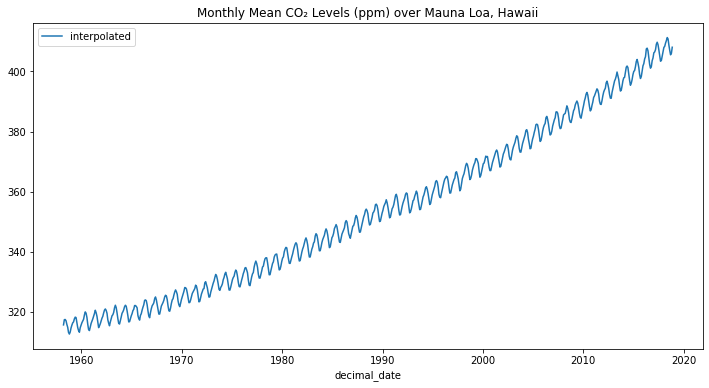

In [6]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
df.plot('decimal_date','interpolated',figsize=(12,6),title=title)

In [ ]:
# time resampling 
"""
changing the frequency of your time series observations. Two types of resampling are: 
Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds. 
Downsampling: Where you decrease the frequency of the samples, such as from days to months
we can resample and apply some aggregation on it like means, std 
"""

In [ ]:
# Starbucks stock data from 2015 to 2018 which includes daily closing prices(last traded) and trading volumes

In [7]:
df = pd.read_csv('data/starbucks.csv', index_col='Date', parse_dates=True)

In [8]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


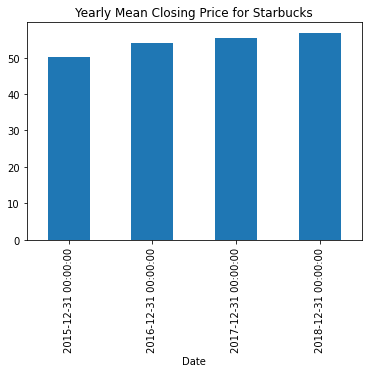

In [9]:
# yearly mean frequency 
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks')

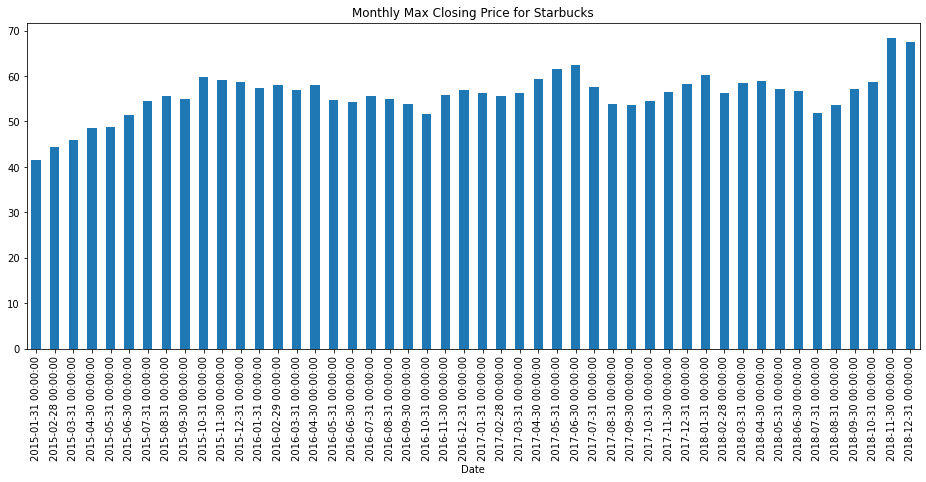

In [10]:
# monthly max frequency
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

In [ ]:
# time shifting
# shifting the values back and forward in time, such as to calculate percentage change from sample to sample.
# shift all your data up or down along the time series index

In [11]:
# shift one month forward
print(df.head(),df.shift(periods=1, freq='M').head(),sep='\n\n',end='\n\n')
print(df.tail(),df.shift(periods=1, freq='M').tail(),sep='\n\n',end='\n\n')

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

              Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548

            Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183

            Close    Volume
Date                       
2018-12-31  60.56   6323252
2018-12-31  63.08  16646238
2018-12-31  63.20  11308081
2018-12-31  63.39   7712127
2019-01-31  64.40   7690183



In [12]:
# shift one month backward
print(df.head(),df.shift(periods=-1, freq='M').head(),sep='\n\n',end='\n\n')
print(df.tail(),df.shift(periods=-1, freq='M').tail(),sep='\n\n',end='\n\n')

              Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

              Close    Volume
Date                         
2014-12-31  38.0061   6906098
2014-12-31  37.2781  11623796
2014-12-31  36.9748   7664340
2014-12-31  37.8848   9732554
2014-12-31  38.4961  13170548

            Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183

            Close    Volume
Date                       
2018-11-30  60.56   6323252
2018-11-30  63.08  16646238
2018-11-30  63.20  11308081
2018-11-30  63.39   7712127
2018-11-30  64.40   7690183



In [ ]:
# moving means:-
# series of averages of different subsets of the full data set
# smooth out short-term fluctuations and highlight longer-term trends or cycles
# Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the
# average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; 
# that is, excluding the first number of the series and including the next value in the subset.

In [ ]:
# rolling
# divides the data into "windows" of time, and then calculate an aggregate function for each window. 
# In this way we obtain a simple moving average
# ex:- window 7(21)
# 1)1-7
# 2)2-8
# 3)3-9 so on 

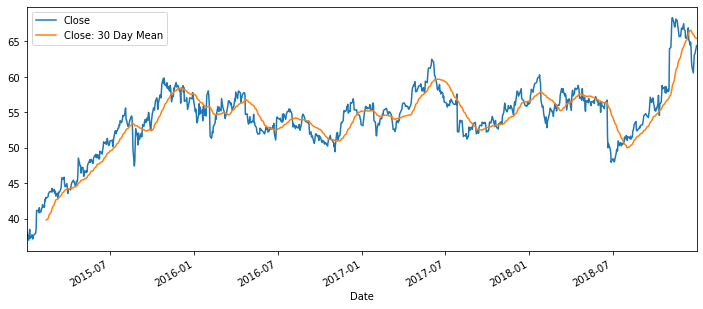

In [13]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

In [ ]:
# expanding
# take into account everything from the start of the time series up to each point in time
# ex:- window 7(21)
# 1)1-7
# 2)2-8
# 3)3-9 so on 

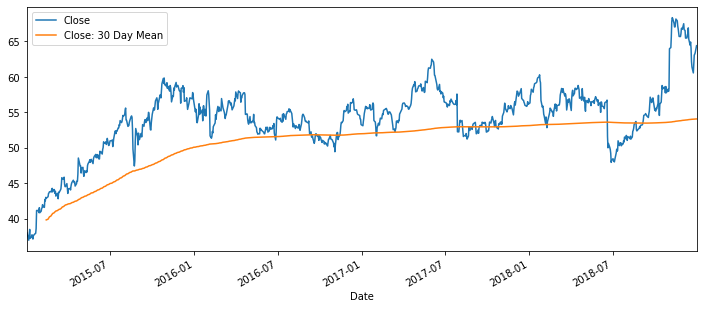

In [14]:
df['Close: 30 Day Mean'] = df['Close'].expanding(min_periods=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

<h1 style="color:skyblue">Stats Model</h1>

In [ ]:
# HP filter
# separates a time-series into a trend component and a cyclical component
# (cyclic pattern exhibit rise and fall which are not part of a fixed period) 
# by min loss fn using a smoothing parameter which handles handles variations in the growth rate 
# of the trend 

In [ ]:
# data set explained 
# gdp:- gross domestic poduct(the total value of goods produced and services provided in a country during one year.)
# realcons  - Real personal consumption expenditures(how much money Americans spend on goods and services)
# realinv   - Real gross private domestic investment
# realgovt  - Real federal consumption expenditures & gross investment
# realdpi   - Real private disposable income(amount of net income that remains after households pay all their taxes 
#             It also represents the amount households will spend on goods and services or will save to invest)
# cpi       - End of the quarter consumer price index for all urban consumers; measures the average change in 
#             prices over time that consumers pay for a basket of goods and services.
# m1        - End of the quarter nominal money stock; all the currency and other liquid instruments in a country's 
#             economy
# population, unemployment rate, 
# interest rate - amount a lender charges for the use of assets expressed as a percentage of the principal.
# inflation rate - 
# Inflation is a quantitative measure of the rate at which the average price level of a basket of 
# selected goods and services in an economy increases over some period of time. It is the rise in the general level of
# prices where a unit of currency effectively buys less than it did in prior periods. Often expressed as a percentage,
# inflation thus indicates a decrease in the purchasing power of a nation’s currency

In [15]:
df = pd.read_csv('data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


[Text(0, 0.5, 'REAL GDP')]

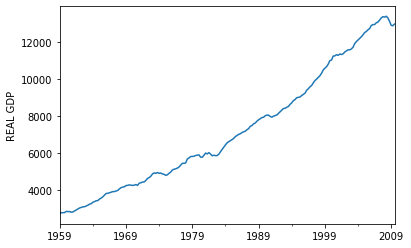

In [16]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP')

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [19]:
df['trend'] = gdp_trend

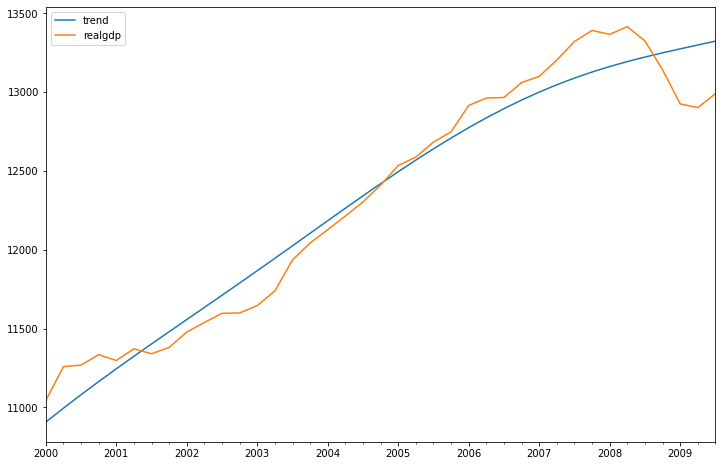

In [20]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [ ]:
# ETS decomposition error/residual, trend , seasonality 
# two models 
# additive:- linear
# multiplicative :- non linear 

In [21]:
airline = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


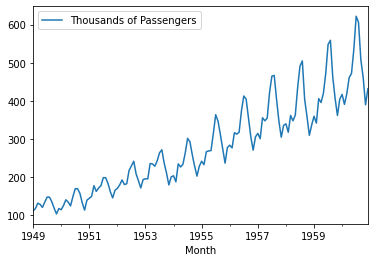

In [22]:
airline.plot()

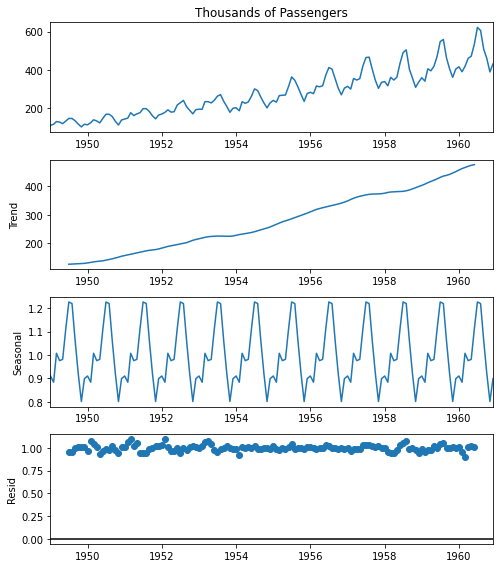

In [35]:
# you can see that data is non linear by seeing this plot so use mul model 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [7, 8]
result = seasonal_decompose(airline['Thousands of Passengers'], model='mul', period = 12) 
result.plot();

<h1 style="color:skyblue">moving means</h1> 

In [ ]:
# simple moving average:-
"""
Forecasts based on more error terms(white noise)
Smaller windows will lead to more noise, rather than signal
It will always lag by the size of the window
It will never reach to full peak or valley of the data due to the averaging.
Does not really inform you about possible future behavior, all it really does is describe trends in your data.
Extreme historical values can skew your SMA significantly
"""

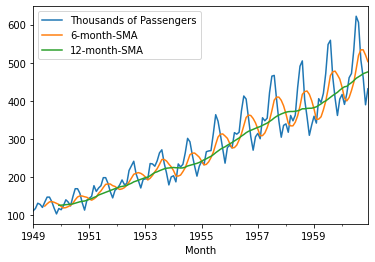

In [22]:
# simple moving average
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot()

In [ ]:
# exponential weighted moving average 
"""
it will put more weight on values that occured more recently (by applying more weight to the more recent values, 
thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in 
the EWMA and the number of periods given a window size
    t
y = ∑ w.i x.t-i / w.i  ; 
   i=0
adjust=True; 𝑤𝑖=(1−𝛼)**𝑖; 𝛼 is between 0 and 1 
adjust=False; 𝑤𝑖=𝛼(1−𝛼)**𝑖 if 𝑖<𝑡 (1−𝛼)**𝑖 if 𝑖=𝑡.
𝛼 = 2/s+1;s>=1; or 1/1+c;c>=0; or 1-exp**log 0.5/h;h>0
Span(S) corresponds to what is commonly called an “N-day EW moving average”.
Center of mass(C) has a more physical interpretation and can be thought of in terms of span:  𝑐=(𝑠−1)/2 
Half-life(h) is the period of time for the exponential weight to reduce to one half.
Alpha specifies the smoothing factor directly; Simple Exponential Smoothing .
disadv:- failed to account for other contributing factors like trend and seasonality.
"""

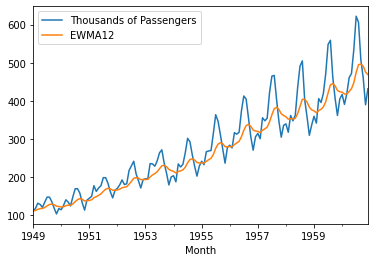

In [23]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline[['Thousands of Passengers','EWMA12']].plot()

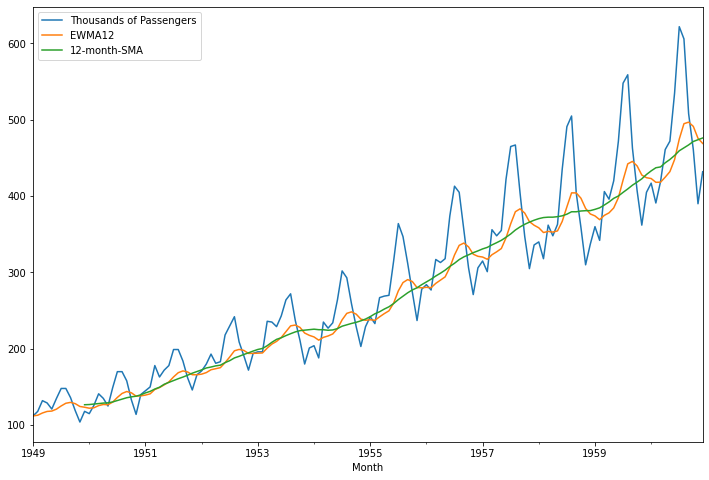

In [24]:
# compare SMA and EWMA
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

In [ ]:
# Double Exponential Smoothing:- new smoothing factor  𝛽  (beta) that addresses trend
# Triple Exponential Smoothing:- smoothing factor 𝛾 (gamma) that addresses seasonality
# both 𝛽 and 𝛾 between 0 and 1 

In [25]:
airline.index.freq = 'MS'
airlines = airline['Thousands of Passengers']
airlines = airlines.to_frame()

In [ ]:
# simple exponential smoothing 
# y0=x0; yt=(1−𝛼)yt−1+𝛼xt

In [26]:
# the statsmodels SimpleExpSmoothing function shifts fitted values down one row. We fix this by adding .shift(-1) 
# after .fittedvalues
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

airlines['EWMA12'] = airlines['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
airlines['SES12']=SimpleExpSmoothing(airlines['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [ ]:
# double exponential smoothing 
# We can also address different types of change (growth/decay) in the trend. If a time series displays a 
# straight-line sloped trend, you would use an additive adjustment. If the time series displays an exponential 
# (curved) trend, you would use a multiplicative adjustment.

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
airlines['DESadd12'] = ExponentialSmoothing(airlines['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airlines['DESmul12'] = ExponentialSmoothing(airlines['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [ ]:
# triple exponential smoohing:- trend + seasonality 

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
airlines['TESadd12'] = ExponentialSmoothing(airlines['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airlines['TESmul12'] = ExponentialSmoothing(airlines['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

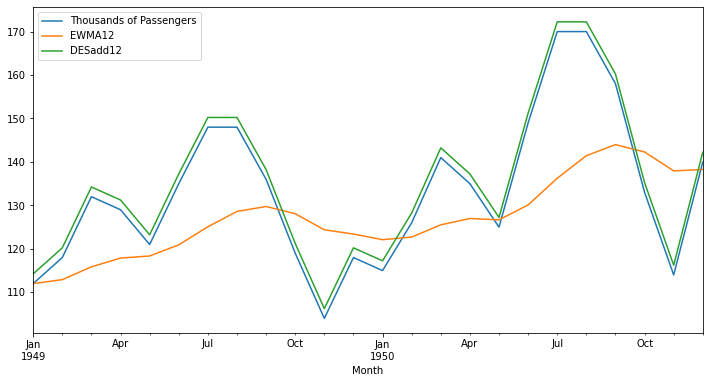

In [30]:
airlines[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

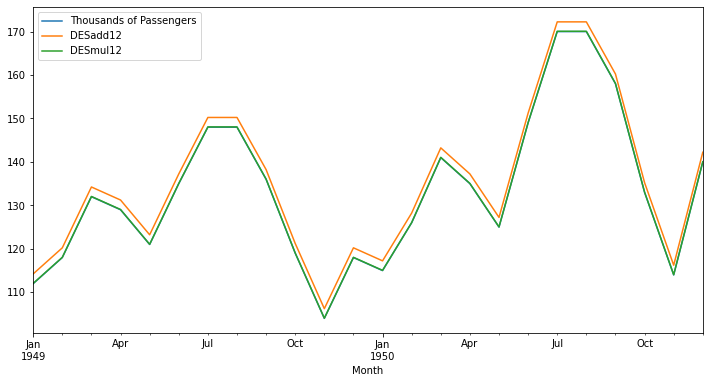

In [31]:
airlines[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

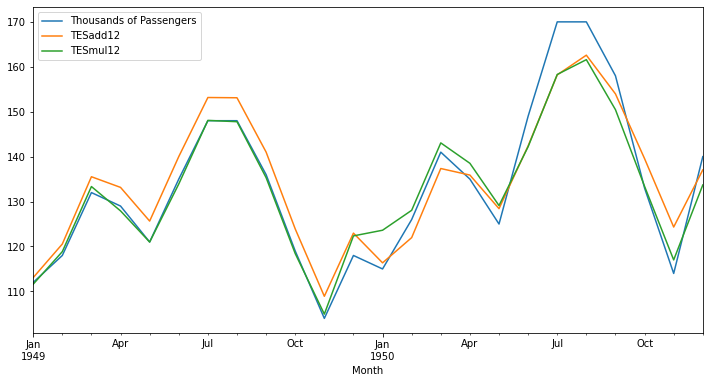

In [32]:
airlines[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

<h1 style="color:skyblue">Time Series Forecasting</h1> 

In [33]:
airlines = airline['Thousands of Passengers']
airlines = airlines.to_frame()

In [34]:
# train test split
train_data = airlines.iloc[:109] # Goes up to but not including 109
test_data = airlines.iloc[108:]
print(train_data.head(),test_data.head(),sep='\n\n')

            Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

            Thousands of Passengers
Month                              
1958-01-01                      340
1958-02-01                      318
1958-03-01                      362
1958-04-01                      348
1958-05-01                      363


In [35]:
# fit the model
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# predict 
# The number of out of sample forecasts from the end of the sample 
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [38]:
print(test_data.info(),len(test_predictions.to_list()),sep='\n\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1958-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes
None

36


In [39]:
print(test_data.head(),test_predictions.head(),sep='\n\n',end='\n\n')
print(test_data.tail(),test_predictions.tail(),sep='\n\n')

            Thousands of Passengers
Month                              
1958-01-01                      340
1958-02-01                      318
1958-03-01                      362
1958-04-01                      348
1958-05-01                      363

1958-02-01    339.140727
1958-03-01    399.272389
1958-04-01    394.215988
1958-05-01    402.530734
1958-06-01    473.134973
Freq: MS, Name: HW Forecast, dtype: float64

            Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

1960-09-01    581.523445
1960-10-01    502.291912
1960-11-01    442.620612
1960-12-01    497.089456
1961-01-01    522.843552
Freq: MS, Name: HW Forecast, dtype: float64


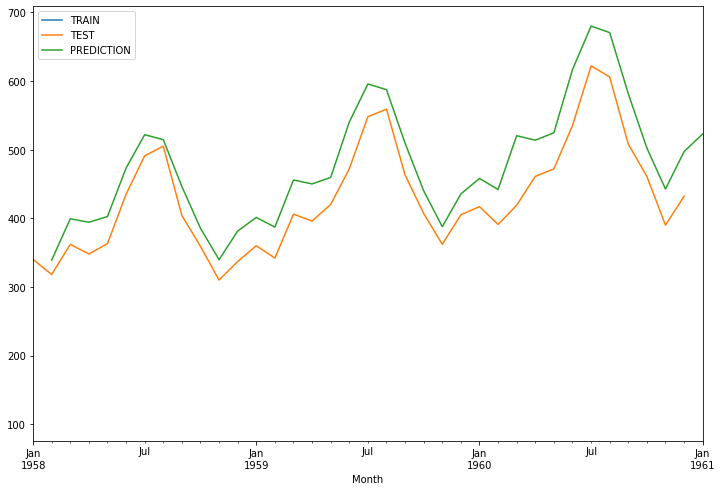

In [40]:
# EDA
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

In [41]:
# evaluation:- root mean squared error 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_data,test_predictions))

74.919736142903

In [ ]:
# stationarity and differencing 
# Non-stationary data can be made to look stationary through differencing. A simple differencing method calculates 
# the difference between consecutive points.

In [42]:
df2 = pd.read_csv('data/samples.csv',index_col=0,parse_dates=True)

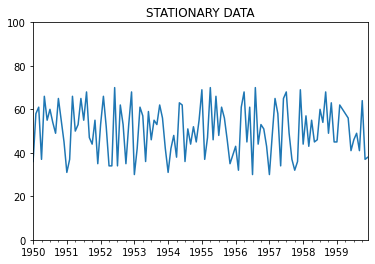

In [43]:
# stationary
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

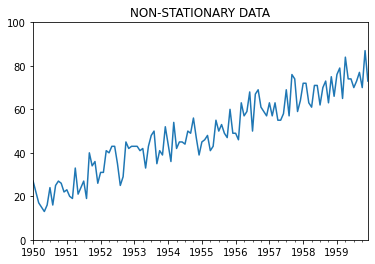

In [44]:
# non stationary 
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

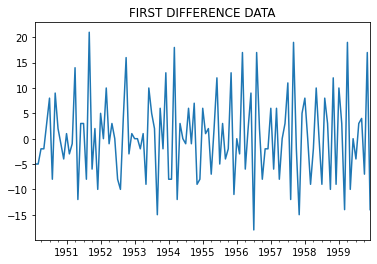

In [45]:
# differencing
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['b'],k_diff=1)

df2['d1'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True)

<h1 style="color:skyblue">Forecasting Models</h1>

In [ ]:
# ARIMA
# Moving Averages we've already seen with EWMA and the Holt-Winters Method.
# Integration will apply differencing to make a time series stationary, which ARIMA requires.
# Autoregression is explained in detail in the next section. Here we're going to correlate a current time series with 
# a lagged version(reflects the value of  𝑦  at a prior point in time) of the same series.

In [46]:
# Load a non-stationary dataset
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [47]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# covariance:-  how the variance in x relates to the variance in y; if the covariance is positive it means that 
# x  and  y  are changing in the same direction, and may be related. 
# With a time series, x is a fixed interval. Here we want to look at the variance of yt against lagged or shifted 
# values of yt+k
# For a stationary time series, the autocovariance function for 𝛾(gamma) is given as:
# Cov[𝑋𝑡1,𝑋𝑡2]=E[(𝑋𝑡1−𝜇)(𝑋𝑡2−𝜇)]; biased:- Expected value is /n
# unbiased covariance:- expected value is /n-k  

In [49]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

In [50]:
arr2 = acovf(df['a'],unbiased=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

In [ ]:
# auto correlation(ρ) 
# correlation of time series observations calculated with values of same series at previous times
# identifies moving averages
# cov(y1,y2) / 𝜎2 
# between -1 and 1 

In [51]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [ ]:
# partial autocorrelation:-
# measure the linear dependence of one variable after removing the effect of other variable(s) that affect both 
# variables. That is, the partial autocorrelation at lag 𝑘 is the autocorrelation between 𝑦𝑡 and 𝑦𝑡+𝑘  
# that is not accounted for by lags 1 through 𝑘−1 .
# identifies auto regression

In [52]:
# biased:- maximum likelihood estimation 
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [53]:
# partial auto correlation with ordinary least squares method instead of MLE 
arr6 = pacf_ols(df['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

In [ ]:
# plotting covariance 

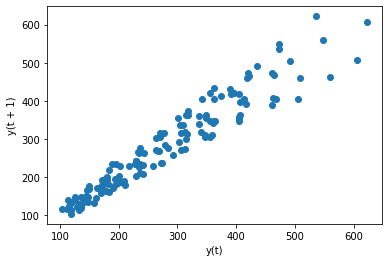

In [54]:
from pandas.plotting import lag_plot
# strong high auto correlation so not stationary 
lag_plot(df1['Thousands of Passengers'])

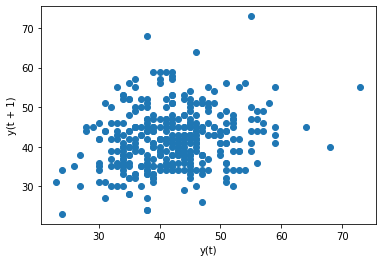

In [55]:
# no auto correlation so stationary data 
lag_plot(df2['Births'])

In [56]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# acf plots 
# lags on the horizontal axis and correlations on the vertical axis. The first value  𝑦0  is always 1. 
# A sharp dropoff indicates that there is no AR component in the ARIMA model and stationary data.
# plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

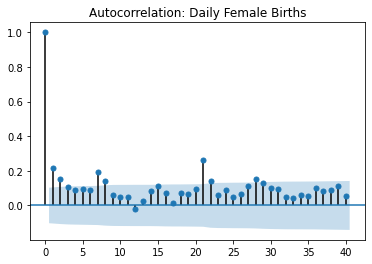

In [57]:
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

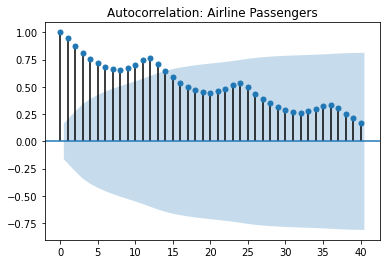

In [58]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

In [ ]:
# pacf plots 
# work best with stationary data

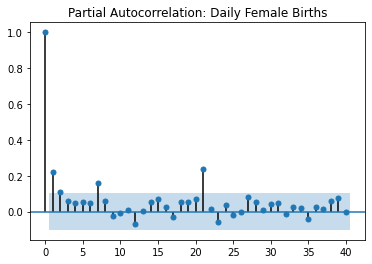

In [59]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);

In [60]:
# do differencing for making airlines stationary 
df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)

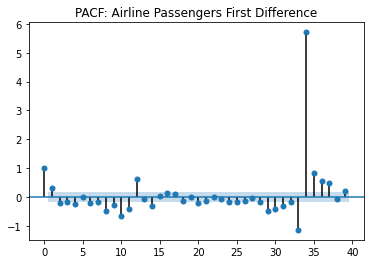

In [61]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));

<h2 style="color:skyblue">AR</h2>

In [ ]:
# auto regression
# In an autoregression model, we forecast using a linear combination of past values of the variable. 
# The term autoregression describes a linear regression(correlation) of the variable against itself b/w data in current series and past values. An autoregression is run against 
# a set of lagged values of order p .
# We predict future values based on a weighted sum of past values 
# lag coeffients are usually less than one, 
# we usually restrict autoregressive models to stationary data
# 𝑦𝑡 = 𝑐 + 𝜙1𝑦𝑡−1 + 𝜙2𝑦𝑡−2 +⋯+ 𝜙𝑝𝑦𝑡−𝑝 + 𝜀𝑡
# here 𝑐 is a constant, 𝜙1 and  𝜙2  are lag coefficients up to order 𝑝 , and 𝜀𝑡 is white noise.
# white noise has zero mean with constant variance and no correlation between its values at different points 
# which doesnt help to predict future values 
# for an AR(1) model:  −1<𝜙1<1; current value is based on preceding value  
# and for an AR(2) model:  −1<𝜙2<1, 𝜙1+𝜙2<1, 𝜙2−𝜙1<1; current value is based on preceding 2 values 

In [62]:
from statsmodels.tsa.ar_model import AR,ARResults

In [63]:
df = pd.read_csv('data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

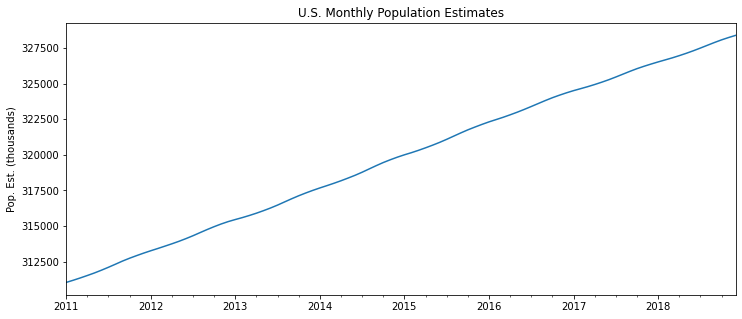

In [64]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [65]:
# train test splits 
train = df.iloc[:84]
test = df.iloc[84:]

In [ ]:
# parameter tuning for getting optimal no of lags 

In [66]:
# fit AR 1 
# 𝑦𝑡 = 𝑐 + 𝜙1𝑦𝑡−1 + 𝜀𝑡
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        156.217773
L1.PopEst      0.999510
dtype: float64


In [67]:
# predict for test 
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [68]:
print(test,predictions1,sep='\n\n')

            PopEst
DATE              
2018-01-01  326527
2018-02-01  326669
2018-03-01  326812
2018-04-01  326968
2018-05-01  327134
2018-06-01  327312
2018-07-01  327502
2018-08-01  327698
2018-09-01  327893
2018-10-01  328077
2018-11-01  328241
2018-12-01  328393

2018-01-01    326374.158707
2018-02-01    326370.319297
2018-03-01    326366.481770
2018-04-01    326362.646125
2018-05-01    326358.812362
2018-06-01    326354.980478
2018-07-01    326351.150474
2018-08-01    326347.322348
2018-09-01    326343.496099
2018-10-01    326339.671726
2018-11-01    326335.849230
2018-12-01    326332.028607
Freq: MS, Name: AR(1) Predictions, dtype: float64


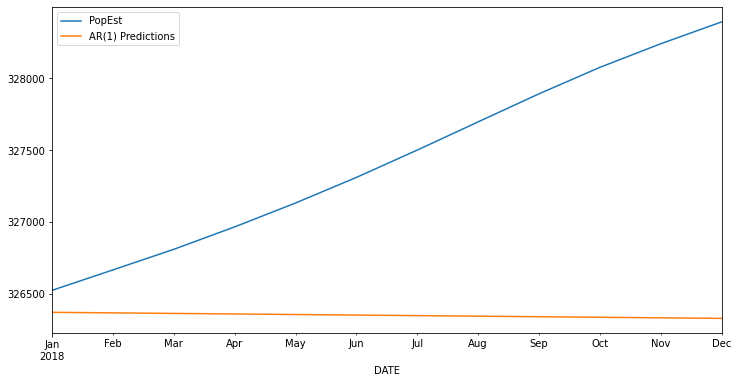

In [69]:
# plot it 
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [ ]:
# AR2

In [70]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        136.742071
L1.PopEst      1.996346
L2.PopEst     -0.996775
dtype: float64


In [71]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

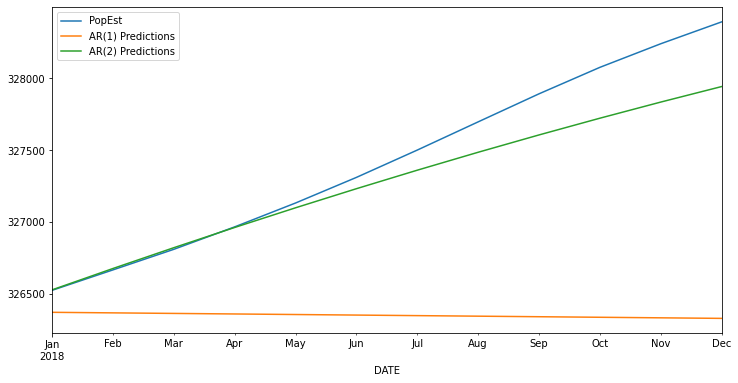

In [72]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

In [ ]:
# AR(p)

In [73]:
model = AR(train['PopEst'])
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.177207
L1.PopEst      2.301809
L2.PopEst     -2.204560
L3.PopEst      1.798151
L4.PopEst     -1.542179
L5.PopEst      1.051568
L6.PopEst     -1.055928
L7.PopEst      1.040001
L8.PopEst     -0.432103
L9.PopEst      0.257224
L10.PopEst    -0.177785
L11.PopEst    -0.036501
dtype: float64


In [74]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

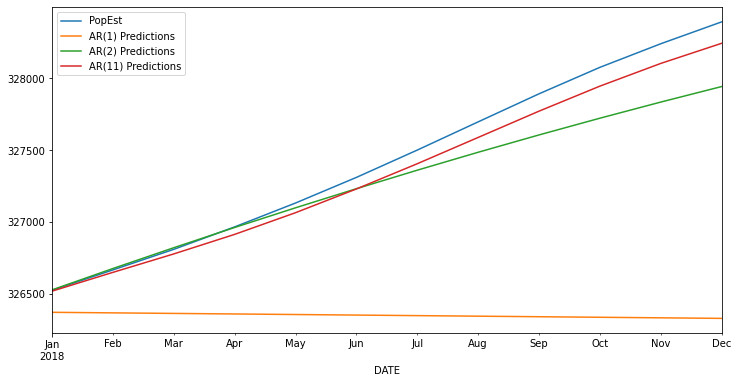

In [75]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

In [76]:
# evaluation 
# We see right away how well AR(11) outperformed the other two models.
labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1553297.653
AR(2) Error: 53737.30635
AR(11) Error: 9019.412247


DATE
2018-08-01    327698
2018-09-01    327893
2018-10-01    328077
2018-11-01    328241
2018-12-01    328393
Freq: MS, Name: PopEst, dtype: int64

2019-01-01    328534.457448
2019-02-01    328665.891031
2019-03-01    328796.502987
2019-04-01    328934.510895
2019-05-01    329086.637837
2019-06-01    329252.452514
2019-07-01    329426.387545
2019-08-01    329605.538062
2019-09-01    329783.487864
2019-10-01    329951.428119
2019-11-01    330103.993534
2019-12-01    330239.880982
2020-01-01    330362.949546
Freq: MS, Name: Forecast, dtype: float64


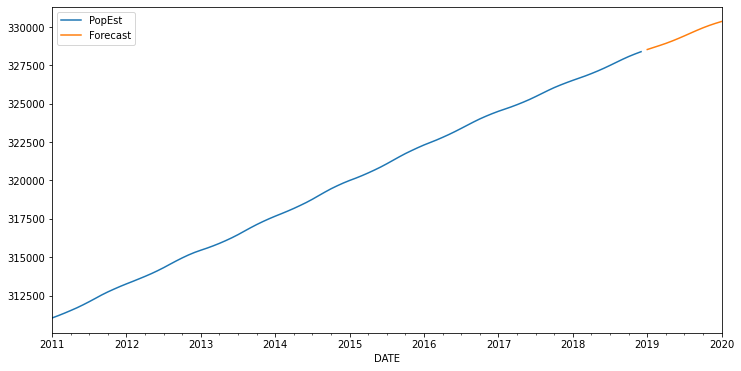

In [77]:
# forecasting after doing parameter tuning of no of lags 
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')
# print the both data sets 
print(df['PopEst'].tail(5),fcast,sep='\n\n')
# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6))

In [ ]:
# descriptive stats(stationarity, mse, rmse, monthly and quarterly plot)

In [78]:
# Load a non-stationary dataset
df1 = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [79]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram,adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [80]:
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
# tests for stationarity 
# mean and variance are fixed between any two equidistant points
# That is, no matter where you take your observations, the results should be the same. 
# A times series that shows seasonality is not stationary.
# hypothesis test, where the null hypothesis 𝐻0 is that the series is nonstationary; 𝜙=1 
# The alternate hypothesis  𝐻1  supports stationarity
# A small p-value ( 𝑝<0.05 ) indicates strong evidence against the null hypothesis.
# Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, 
# and so we fail to reject the null hypothesis, and decide that our dataset is not stationary.
# AIC(Info Criteria):- measure of the goodness fit of an estimated statistical model

In [81]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [82]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In [83]:
# evaluation RMSE, MSE 
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
MSE = mse(df['test'],df['predictions'])
RMSE = rmse(df['test'],df['predictions'])
print(f'Model  MSE: {MSE:.3f}')
print(f'Model RMSE: {RMSE:.3f}')

Model  MSE: 17.020
Model RMSE: 4.126


In [ ]:
# month plot and quarter plot for seasonality 

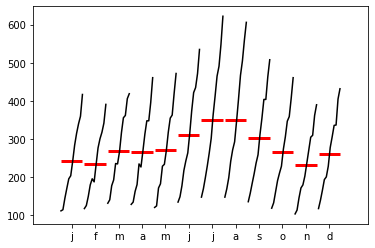

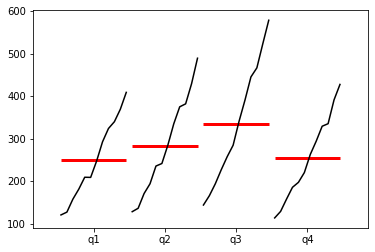

In [84]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df1['Thousands of Passengers']);

dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);

<h2 style="color:skyblue">ARMA(auto regression and moving averages)</h2>

In [ ]:
"""
Recall that an AR(1) model follows the formula
𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 
while an MA(1) model follows the formula
𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 
where c is a constant, 𝜇 is the expectation of 𝑦𝑡, 𝜙1 is the AR lag coefficient, 𝜃1 is the MA lag coefficient, 
and 𝜀 is white noise.
An ARMA(1,1) model therefore follows
𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡
works on stationary data 
"""

In [85]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [86]:
# Load datasets 
# stationary
df1 = pd.read_csv('data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

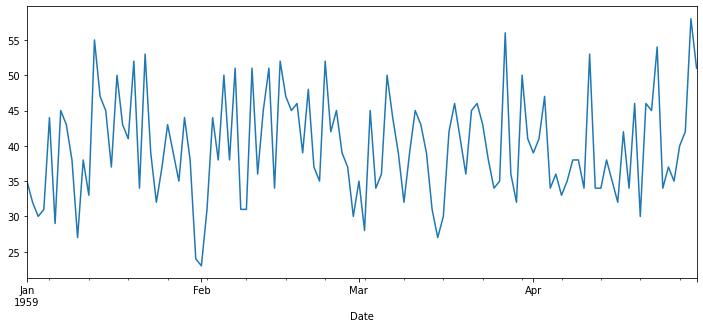

In [87]:
# plot the data 
df1['Births'].plot(figsize=(12,5));

In [ ]:
# stationary test

In [88]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [89]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [90]:
# train test split 
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

In [91]:
# fit 
# The (p,q) order of the model for the number of AR parameters
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 23 May 2020   AIC                            627.809
Time:                        04:03:41   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [92]:
# predict 
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')
print(test.head(),predictions.head(),sep='\n\n')

            Births
Date              
1959-04-01      39
1959-04-02      41
1959-04-03      47
1959-04-04      34
1959-04-05      36

1959-04-01    39.982219
1959-04-02    39.992614
1959-04-03    39.809829
1959-04-04    39.848173
1959-04-05    39.761537
Freq: D, Name: ARMA(2,2) Predictions, dtype: float64


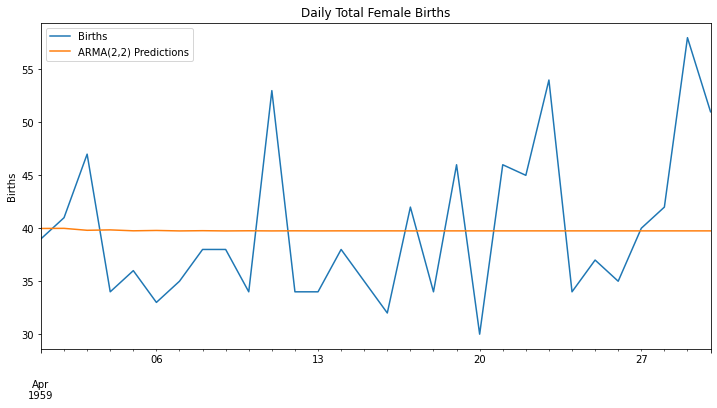

In [93]:
# plot test vs predictions 
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

<h2 style="color:skyblue">ARIMA(auto regression Integration and moving averages)</h2>

In [ ]:
# The steps are the same as for ARMA(p,q), except that we'll apply a differencing component(d) to make the dataset 
# stationary.

In [94]:
df2 = pd.read_csv('data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

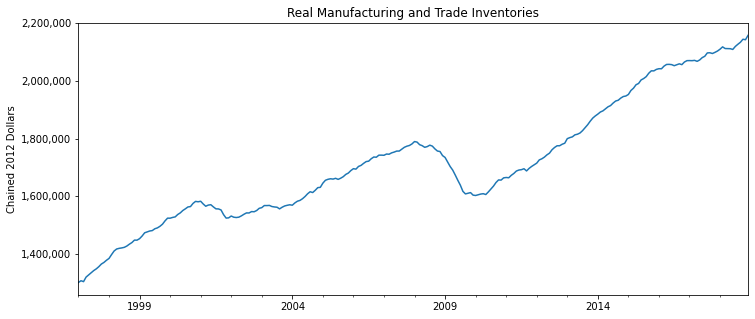

In [95]:
# plot the data 
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [96]:
# integrate i.e convert data to stationary 
df2['d1'] = diff(df2['Inventories'],k_diff=1)
adf_test(df2['d1'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
"""
If the PACF displays a sharp cutoff while the ACF decays more slowly we say that the stationarized series displays 
an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms 
than by adding MA terms.
"""

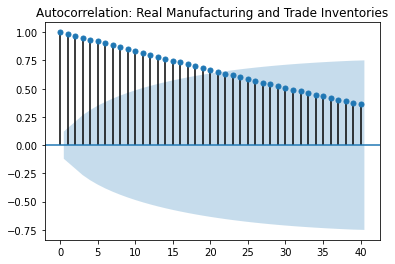

In [97]:
# acf plot
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df2['Inventories'],title=title,lags=lags);

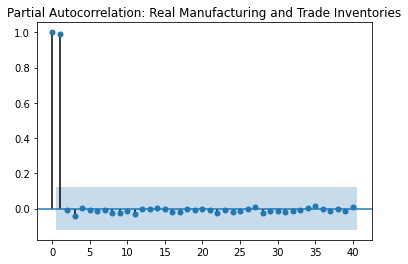

In [98]:
# pacf plot
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df2['Inventories'],title=title,lags=lags);

In [99]:
# train test split
train = df2.iloc[:252]
test = df2.iloc[252:]

In [100]:
# train 
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.004
Date:                Sat, 23 May 2020   AIC                           4980.788
Time:                        04:04:10   BIC                           4994.889
Sample:                    02-01-1997   HQIC                          4986.462
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3246.5294   1345.056      2.414      0.016     610.268    5882.791
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# dynamic=False means that forecasts at each point are generated using the full history up to that point 
# (all lagged values).
#  typ='levels' predicts the levels of the original endogenous variables

In [101]:
# predict  
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2107159.099, expected=2110158
predicted=2110551.457, expected=2118199
predicted=2113929.607, expected=2112427
predicted=2117294.933, expected=2112276
predicted=2120648.685, expected=2111835
predicted=2123991.99 , expected=2109298
predicted=2127325.866, expected=2119618
predicted=2130651.233, expected=2127170
predicted=2133968.918, expected=2134172
predicted=2137279.671, expected=2144639
predicted=2140584.166, expected=2143001
predicted=2143883.014, expected=2158115


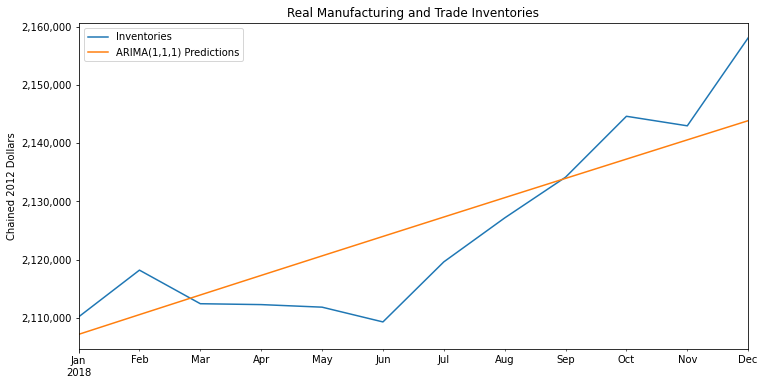

In [102]:
# plot test vs predictions 
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [103]:
# evaluation
error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error:   7760.1646


<h2 style="color:skyblue">SARIMA(seasonal ARIMA)</h2>

In [ ]:
# SARIMA(p, d, q).(P,D,Q)m
# Where ARIMA accepts the parameters (p,d,q)
# rest represent the seasonal regression, differencing and moving average coefficients, and 𝑚 represents the 
# number of data points (rows) in each seasonal cycle.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
df = pd.read_csv('data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(df.head())

            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


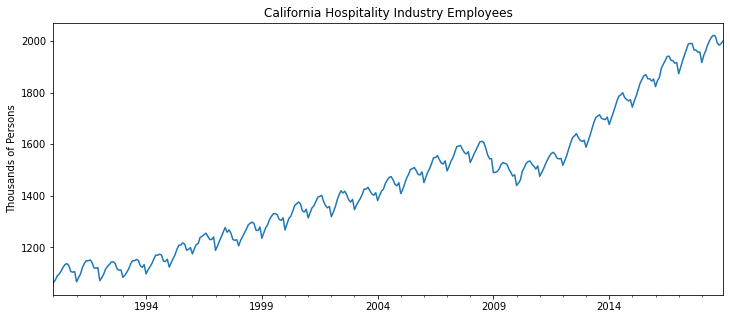

In [28]:
# plot the data 
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

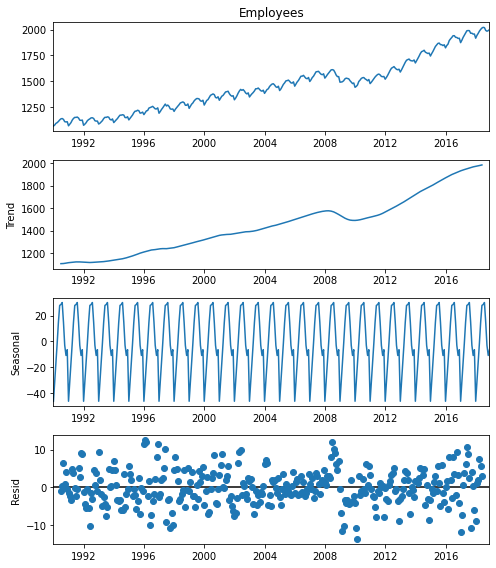

In [34]:
# seasonality decompose
# decompose time series into trend, seasonal and residual components   
plt.rcParams['figure.figsize'] = [7, 8]
result = seasonal_decompose(df['Employees'],period = 12, model='add')
result.plot();

In [108]:
# train test split 
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [109]:
# fit the model
model = SARIMAX(train['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Sat, 23 May 2020   AIC                           2196.814
Time:                                    04:09:58   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
# predict
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

In [111]:
# compare predicted and actual test values 
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Employees'][i]}")

predicted=1921.90095 , expected=1916.8
predicted=1944.277732, expected=1944.5
predicted=1963.474255, expected=1962.2
predicted=1990.272682, expected=1984.9
predicted=2008.694934, expected=2001.5
predicted=2025.919654, expected=2015.3
predicted=2034.256704, expected=2022.1
predicted=2034.306382, expected=2019.1
predicted=2014.147428, expected=1992.5
predicted=2013.689596, expected=1984.3
predicted=2005.09161 , expected=1990.1
predicted=2006.280953, expected=2000.2


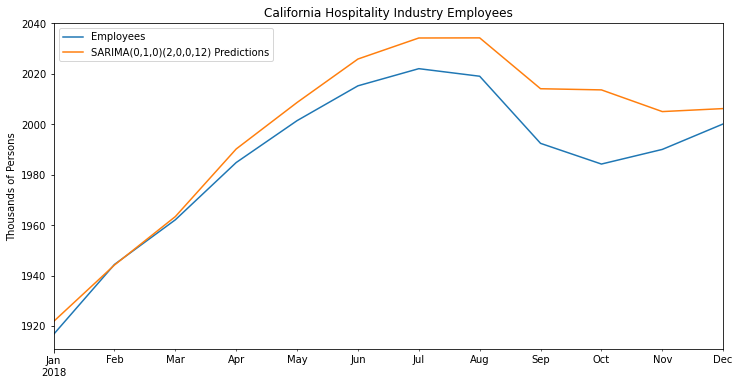

In [112]:
# plot actual vs predicted 
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [113]:
# evaluation
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506699
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222873


In [114]:
# fit on the whole data 
model = SARIMAX(df['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
# predict for the next 11 months 
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

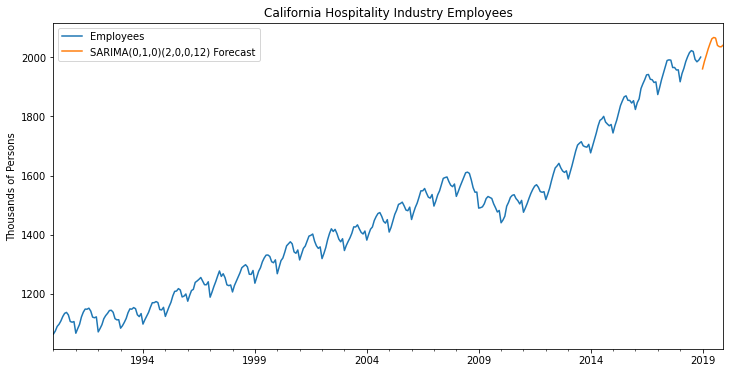

In [115]:
# plot the fitted and predicted model 
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# ! Hurray I have completed Time series Analysis using statsmodels 